# Spam Detection Project Reproduce new data

In [235]:
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import patsy
from statsmodels.discrete.discrete_model import ProbitResults, LogitResults
os.chdir(r"C:\Users\serei\Desktop\Untitled Folder")

The analysis will be conducted using word frequencies from the old research as well as a new word list from the new datsaset. 

## New Data New Words

Import and prepare the dataset for analysis:

In [175]:
spam = pd.read_csv("new_data_new_words.csv")
spam.dropna(inplace = True)

#Renaming character columns to a less error-prone form
spam.rename(columns = {'$':'dollar',
                       '!': 'exclamation',
                      "#": "hashtag",
                       "(":"parenthesis",
                       "[": "brackets",
                       ";": "semicolon",
                       "€": "euro",
                       "@": "at", 
                       "?": "question"
                      }, inplace = True)

#Drop columns not neccessary to the analysis
spam.drop(columns=['Unnamed: 0', 'processed_text', 'word_count'], inplace = True)

#Rename columns to include word_freq
column_names = spam.columns.tolist()
new_column_names = ['spam'] + ['word_freq_' + column if column != 'spam' else column for column in column_names[1:]]

spam.rename(columns=dict(zip(column_names, new_column_names)), inplace=True)

#Convert the dependent variable to a numeric one
spam['spam'] = spam['spam'].replace({
    'spam': 1,
    'ham': 0})

In [176]:
spam.describe

<bound method NDFrame.describe of       spam  word_freq_u  word_freq_call  word_freq_get  word_freq_ur  \
0        0          0.0            0.00            0.0           0.0   
1        0          0.0            0.00            0.0           0.0   
2        1          0.0            0.00            0.0           0.0   
3        0          0.0            0.00            0.0           0.0   
4        0          0.0            0.00            0.0           0.0   
...    ...          ...             ...            ...           ...   
5567     1          0.0            0.08            0.0           0.0   
5568     0          0.0            0.00            0.0           0.0   
5569     0          0.0            0.00            0.0           0.0   
5570     0          0.0            0.00            0.0           0.0   
5571     0          0.0            0.00            0.0           0.0   

      word_freq_gt  word_freq_lt  word_freq_go  word_freq_free  \
0              0.0           0.0   

Very low variances in independent variables cause errors in the models. We set a treshold for the variances of the columns and keep only the columns that can be included in the analysis. 

In [177]:
variance = spam.var()

# Set the threshold value
threshold = 0.003

# Filter columns based on variance threshold
filtered_columns = variance[variance >= threshold].index

# Create a new DataFrame with selected columns
spam = spam[filtered_columns]

spam.var()

spam                      0.116111
word_freq_call            0.005306
word_freq_get             0.003488
word_freq_ur              0.003405
word_freq_gt              0.007387
word_freq_lt              0.009940
word_freq_go              0.004034
word_freq_free            0.004759
word_freq_come            0.003268
word_freq_day             0.003685
word_freq_time            0.003465
word_freq_text            0.004684
word_freq_love            0.003443
word_freq_send            0.003109
word_freq_need            0.003308
word_freq_going           0.004255
word_freq_sorry           0.004954
word_freq_still           0.004305
word_freq_take            0.003129
word_freq_da              0.004420
word_freq_dont            0.003515
word_freq_later           0.007791
word_freq_exclamation     0.003834
word_freq_digit_count    38.995783
dtype: float64

Let us check the distribution of spam and non-spam mails

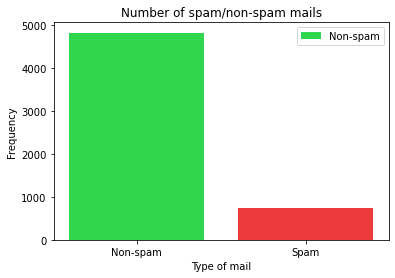

In [178]:
spam_count = spam["spam"].value_counts()
perc_yes = round(spam_count[1] / len(spam) * 100, 2)
perc_no = round(spam_count[0] / len(spam) * 100, 2)

plt.bar(["Non-spam", "Spam"], spam_count, color=["#31d64f", "#ed3b3b"])
plt.title("Number of spam/non-spam mails")
plt.xlabel("Type of mail")
plt.ylabel("Frequency")
plt.legend(["Non-spam", "Spam"])
plt.show()

## Start from the most general model that contains all explanatory variables

In [254]:
formula = "spam ~ " + " + ".join(spam.columns[1:])

### Probit model
---

In [255]:
myprobit = sm.Probit.from_formula(formula, data=spam).fit()
print(myprobit.summary())

         Current function value: 0.084801
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 5572
Model:                         Probit   Df Residuals:                     5548
Method:                           MLE   Df Model:                           23
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  0.7848
Time:                        12:51:21   Log-Likelihood:                -472.51
converged:                      False   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.2321      0.061    -36.431      0.000      -2.352      -2.112
word_freq_call           -3.0682

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Logit model
---

In [256]:
mylogit = sm.Logit.from_formula(formula, data=spam).fit()
print(mylogit.summary())

         Current function value: 0.084299
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 5572
Model:                          Logit   Df Residuals:                     5548
Method:                           MLE   Df Model:                           23
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  0.7861
Time:                        12:51:23   Log-Likelihood:                -469.72
converged:                      False   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.2063      0.143    -29.436      0.000      -4.486      -3.926
word_freq_call           -5.9051

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Significance test of models

Both models p-values are 0, so null hypothesis can be rejected. It means that the model`s coefficients are jointly significant

In [257]:
null_probit = sm.Probit(spam["spam"], sm.add_constant(pd.Series([1] * len(spam)))).fit()
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Optimization terminated successfully.
         Current function value: 0.394038
         Iterations 5
Probit likelihood ratio test p-value: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [258]:
null_logit = sm.Logit(spam["spam"], sm.add_constant(pd.Series([1] * len(spam)))).fit()
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Optimization terminated successfully.
         Current function value: 0.394038
         Iterations 6
Logit likelihood ratio test p-value: 0.0


## Stepwise regression

In [259]:
p_probit = myprobit.pvalues
spam_temp_probit = spam.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = "spam ~"
    
    for column in spam_temp_probit.columns[1:]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)

word_freq_gt
         Current function value: 0.084816
         Iterations: 35
991.1940869610173
word_freq_da
         Current function value: 0.085715
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


999.2063848097096
word_freq_lt
         Current function value: 0.090247
         Iterations: 35
1047.7131104852485
word_freq_later
Optimization terminated successfully.
         Current function value: 0.090668
         Iterations 10
1050.4072904922891
word_freq_get


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.090669
         Iterations 10
1048.4154478192277
word_freq_go
Optimization terminated successfully.
         Current function value: 0.090671
         Iterations 10
1046.4426142168152
word_freq_dont
Optimization terminated successfully.
         Current function value: 0.090676
         Iterations 10
1044.4917974879752
word_freq_day
Optimization terminated successfully.
         Current function value: 0.090683
         Iterations 10
1042.5711276093857
word_freq_take
Optimization terminated successfully.
         Current function value: 0.090704
         Iterations 10
1040.8103242756306
word_freq_come
Optimization terminated successfully.
         Current function value: 0.090728
         Iterations 10
1039.0676621119137
word_freq_send
Optimization terminated successfully.
         Current function value: 0.090776
         Iterations 10
1037.6113412700504
word_freq_time
Optimization terminated successfully.
      

In [260]:
p_logit = mylogit.pvalues
spam_temp_logit = spam.copy()

while any(p_logit > 0.05):
    worstp = p_logit.idxmax()
    
    print(worstp)
    spam_temp_logit.drop(columns=worstp, inplace=True)
    
    formula = "spam ~"
    
    for column in spam_temp_logit.columns[1:]:
        formula += f" + {column}"
    
    mylogit = sm.Logit.from_formula(formula, data=spam_temp_logit).fit()
    p_logit = mylogit.pvalues
    print(mylogit.aic)

word_freq_gt
         Current function value: 0.084316
         Iterations: 35
985.6201246859478
word_freq_da
         Current function value: 0.085355
         Iterations: 35
995.1955540349777
word_freq_lt
         Current function value: 0.090632
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1051.9988162051395
word_freq_later
Optimization terminated successfully.
         Current function value: 0.091062
         Iterations 11
1054.7944439196922
word_freq_get
Optimization terminated successfully.
         Current function value: 0.091063
         Iterations 11
1052.801501186288
word_freq_day
Optimization terminated successfully.
         Current function value: 0.091064
         Iterations 11
1050.8192514721536
word_freq_go
Optimization terminated successfully.
         Current function value: 0.091069
         Iterations 11
1048.8679678238063
word_freq_dont
Optimization terminated successfully.
         Current function value: 0.091080
         Iterations 11
1046.9987516065285
word_freq_come
Optimization terminated successfully.
         Current function value: 0.091120
         Iterations 11
1045.4394448721005
word_freq_take
Optimization terminated successfully.
         Current function value: 0.091180
         Iterations 11
1044.1081245022165
word_freq_time
Optimizatio

## Link test

In [261]:
def linktest_probit(model):
    """
    Function to perform linktest on a logistic regression model.
    
    Args:
    - model: logistic regression model object
    
    Returns:
    - aux_reg: auxiliary regression model object
    """
    
    # Prepare the data
    y = model.model.endog
    pred = model.predict()
    pred = np.clip(pred, 1e-12, 1 - 1e-12)
    yhat = np.log(pred/(1-pred))
    yhat2 = yhat**2

    # Add constant column to predictor variables
    X = np.column_stack((np.ones_like(y), yhat, yhat2))

    # Remove rows with missing or infinite values
    valid_idx = np.isfinite(X).all(axis=1)
    X = X[valid_idx]
    y = y[valid_idx]

    # Fit the binomial regression model
    model = sm.GLM(y, X, family=sm.families.Binomial(link=sm.genmod.families.links.probit()))
    result = model.fit()
    
    return result

def linktest_logit(model):
    """
    Function to perform linktest on a logistic regression model.
    
    Args:
    - model: logistic regression model object
    
    Returns:
    - aux_reg: auxiliary regression model object
    """
    
    # Prepare the data
    y = model.model.endog
    pred = model.predict()
    pred = np.clip(pred, 1e-12, 1 - 1e-12)
    yhat = np.log(pred/(1-pred))
    yhat2 = yhat**2

    # Add constant column to predictor variables
    X = np.column_stack((np.ones_like(y), yhat, yhat2))

    # Remove rows with missing or infinite values
    valid_idx = np.isfinite(X).all(axis=1)
    X = X[valid_idx]
    y = y[valid_idx]

    # Fit the binomial regression model
    model = sm.GLM(y, X, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
    result = model.fit()
    
    return result

In [262]:
# Linktest for probit model - after stepwise regression
linktest_result_probit = linktest_probit(myprobit)
print(linktest_result_probit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5569
Model Family:                Binomial   Df Model:                            2
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -498.75
Date:                Sun, 18 Jun 2023   Deviance:                       997.50
Time:                        12:51:40   Pearson chi2:                 6.00e+04
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1035      0.068      1.533      0.1

In [263]:
# Linktest for logit model - after stepwise regression
linktest_result_logit = linktest_logit(mylogit)
print(linktest_result_logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5569
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -506.88
Date:                Sun, 18 Jun 2023   Deviance:                       1013.8
Time:                        12:51:42   Pearson chi2:                 4.31e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2302      0.131      1.752      0.0

### Interaction terms
Adding interaction terms and deleting insignificant ones for probit.

In [70]:
spam.columns

Index(['spam', 'word_freq_call', 'word_freq_get', 'word_freq_ur',
       'word_freq_gt', 'word_freq_lt', 'word_freq_go', 'word_freq_free',
       'word_freq_come', 'word_freq_day', 'word_freq_time', 'word_freq_text',
       'word_freq_love', 'word_freq_send', 'word_freq_need', 'word_freq_going',
       'word_freq_sorry', 'word_freq_still', 'word_freq_take', 'word_freq_da',
       'word_freq_dont', 'word_freq_later', 'word_freq_exclamation',
       'word_freq_digit_count'],
      dtype='object')

In [264]:
formula_interactions = "spam ~  word_freq_free * word_freq_exclamation  + word_freq_send "
myprobit = sm.Probit.from_formula(formula_interactions, data=spam).fit()
p_probit = myprobit.pvalues
spam_temp_probit = spam.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = formula_interactions
    
    for column in spam_temp_probit.columns[1:]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)


Optimization terminated successfully.
         Current function value: 0.339735
         Iterations 8


In [265]:
mylogit = sm.Logit.from_formula(formula_interactions, data=spam).fit()
p_logit = mylogit.pvalues
spam_temp_probit = spam.copy()

while any(p_logit > 0.05):
    worstp = p_logit.idxmax()
    
    print(worstp)
    spam_temp_logit.drop(columns=worstp, inplace=True)
    
    formula = formula_interactions
    
    for column in spam_temp_logit.columns[1:]:
        formula += f" + {column}"
    
    mylogit = sm.Logit.from_formula(formula, data=spam_temp_logit).fit()
    p_logit = mylogit.pvalues
    print(mylogit.aic)

Optimization terminated successfully.
         Current function value: 0.340333
         Iterations 9


In [266]:
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Probit likelihood ratio test p-value: 1.2652102247814454e-133


In [267]:
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Logit likelihood ratio test p-value: 3.567628329112654e-132


In [197]:
spam.describe()

,spam,word_freq_call,word_freq_get,word_freq_ur,word_freq_gt,word_freq_lt,word_freq_go,word_freq_free,word_freq_come,word_freq_day,...,word_freq_need,word_freq_going,word_freq_sorry,word_freq_still,word_freq_take,word_freq_da,word_freq_dont,word_freq_later,word_freq_exclamation,word_freq_digit_count
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.00000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,...,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,0.018911,0.012528,0.011000,0.01701,0.019770,0.012389,0.011804,0.009796,0.010405,...,0.008463,0.009878,0.010328,0.009236,0.007626,0.009253,0.007779,0.012394,0.022531,2.371859
std,0.340751,0.072845,0.059060,0.058349,0.08595,0.099698,0.063513,0.068988,0.057165,0.060704,...,0.057515,0.065233,0.070386,0.065609,0.055939,0.066481,0.059286,0.088268,0.061922,6.244660
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000


## Recration from line 267 from R code

In [277]:
formula_interactions = "spam ~  word_freq_free * word_freq_exclamation  + word_freq_send + word_freq_get*word_freq_ur + word_freq_still + word_freq_sorry"

mylogit = sm.formula.glm(formula_interactions, data=spam, family=sm.families.Binomial(sm.genmod.families.links.logit())).fit()

p = mylogit.pvalues
print(p)

mylogit = sm.formula.glm(formula_interactions, data=spam, family=sm.families.Binomial(sm.genmod.families.links.probit())).fit()

p = myprobit.pvalues
print(p)

Intercept                               0.000000e+00
word_freq_free                          1.427736e-26
word_freq_exclamation                   1.769530e-50
word_freq_free:word_freq_exclamation    1.710706e-05
word_freq_send                          1.309985e-03
word_freq_get                           3.225381e-02
word_freq_ur                            9.726582e-05
word_freq_get:word_freq_ur              8.443402e-01
word_freq_still                         7.665286e-03
word_freq_sorry                         1.253296e-03
dtype: float64
Intercept                               0.000000e+00
word_freq_free                          1.892276e-34
word_freq_exclamation                   2.398555e-58
word_freq_free:word_freq_exclamation    3.194177e-08
word_freq_send                          8.336926e-04
dtype: float64


In [270]:
i = 1
while any(p > 0.05):
    worstp = p.idxmax()
    print(worstp)

    if i == 1:
        # Remove the outcome variable from the formula
        formula_interactions = formula_interactions.replace("spam ~ ", "")

        # Create the design matrix with interaction terms
        X = patsy.dmatrix(formula_interactions, data=spam)

        # Convert the design matrix to a DataFrame
        X = pd.DataFrame(X, columns=X.design_info.column_names)
        i=2
    else:
        X = X.drop(worstp, axis=1)
        X_names = ['Intercept'] + list(X.columns)[1:]
        X.columns = X_names

        myprobit = sm.Probit(spam['spam'], X).fit()

        print(myprobit.summary())
        p = myprobit.pvalues
        print(myprobit.aic)

In [271]:
i = 1
while any(p > 0.05):
    worstp = p.idxmax()
    print(worstp)

    if i == 1:
        # Remove the outcome variable from the formula
        formula_interactions = formula_interactions.replace("spam ~ ", "")

        # Create the design matrix with interaction terms
        X = patsy.dmatrix(formula_interactions, data=spam)

        # Convert the design matrix to a DataFrame
        X = pd.DataFrame(X, columns=X.design_info.column_names)
        i=2
    else:
        X = X.drop(worstp, axis=1)
        X_names = ['Intercept'] + list(X.columns)[1:]
        X.columns = X_names

        mylogit = sm.GLM(spam['spam'], X, family=sm.families.Binomial(sm.families.links.logit())).fit()

        print(mylogit.summary())
        p = mylogit.pvalues
        print(mylogit.aic)

### Goodnes of fit tests

In [273]:
gof_results = mylogit.deviance
print("Logit | Goodness-of-Fit Test:")
print("Logit | Deviance: ", gof_results)

Logit | Goodness-of-Fit Test:
Logit | Deviance:  3724.4546891739974


In [274]:
pseudo_r2 = 1 - (mylogit.llf / mylogit.llnull)
print("Logit | Pseudo R-squared: ", pseudo_r2)

pseudo_r2 = 1 - (myprobit.llf / myprobit.llnull)
print("Probit | Pseudo R-squared: ", pseudo_r2)

Logit | Pseudo R-squared:  0.15182947635330202
Probit | Pseudo R-squared:  0.13781243162991275


In [278]:
# Calculating marginal effects
meff = smf.probit(formula_interactions, data=spam_previous_words).fit()
print("Probit | Marginal Effects:")
print(meff.summary())

PatsyError: Error evaluating factor: NameError: name 'word_freq_sorry' is not defined
    spam ~  word_freq_free * word_freq_exclamation  + word_freq_send + word_freq_get*word_freq_ur + word_freq_still + word_freq_sorry
                                                                                                                      ^^^^^^^^^^^^^^^

# New Data Old Words

In this part of the analysis we will try to recreate the previous research on the new data directly.

In [94]:
spam_previous_words = pd.read_csv("new_data_old_words.csv")
spam_previous_words.dropna(inplace = True)

#Renaming character columns to a less error-prone form
spam_previous_words.rename(columns = {'$':'dollar',
                       '!': 'exclamation',
                      "#": "hashtag",
                       "(":"parenthesis",
                       "[": "brackets",
                       ";": "semicolon",
                       "€": "euro",
                       "@": "at", 
                       "?": "question"
                      }, inplace = True)

#Drop columns not neccessary to the analysis
spam_previous_words.drop(columns=['Unnamed: 0', 'processed_text', 'word_count'], inplace = True)

#Rename columns to include word_freq
column_names = spam_previous_words.columns.tolist()
new_column_names = ['spam'] + ['word_freq_' + column if column != 'spam' else column for column in column_names[1:]]

spam_previous_words.rename(columns=dict(zip(column_names, new_column_names)), inplace=True)

#Convert the dependent variable to a numeric one
spam_previous_words['spam'] = spam_previous_words['spam'].replace({
    'spam': 1,
    'ham': 0})

In [86]:
spam_previous_words.describe

<bound method NDFrame.describe of       spam  word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0        0             0.0                0.0           0.00           0.0   
1        0             0.0                0.0           0.00           0.0   
2        1             0.0                0.0           0.00           0.0   
3        0             0.0                0.0           0.00           0.0   
4        0             0.0                0.0           0.00           0.0   
...    ...             ...                ...            ...           ...   
5567     1             0.0                0.0           0.04           0.0   
5568     0             0.0                0.0           0.00           0.0   
5569     0             0.0                0.0           0.00           0.0   
5570     0             0.0                0.0           0.00           0.0   
5571     0             0.0                0.0           0.00           0.0   

      word_freq_our  word_fre

We once again remove the columns with very low variances to ensure that the selected models run smoothly. We decrease the treshold as the previously used words are less frequently found in the new dataset. 

In [99]:
variance = spam_previous_words.var()

# Set the threshold value
threshold = 0.00017

# Filter columns based on variance threshold
filtered_columns = variance[variance >= threshold].index

# Create a new DataFrame with selected columns
spam_previous_words = spam_previous_words[filtered_columns]

spam_previous_words.var()

spam                     0.116111
word_freq_make           0.000206
word_freq_all            0.002106
word_freq_our            0.000249
word_freq_free           0.000335
word_freq_meeting        0.000171
word_freq_re             0.005786
word_freq_edu            0.000193
word_freq_semicolon      0.000912
word_freq_exclamation    0.002293
word_freq_hashtag        0.000174
dtype: float64

## Start from the most general model that contains all explanatory variables

In [280]:
formula = "spam ~ " + " + ".join(spam_previous_words.columns[1:])

### Probit model
---

In [281]:
myprobit = sm.Probit.from_formula(formula, data=spam_previous_words).fit()
print(myprobit.summary())

         Current function value: 0.346699
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 5572
Model:                         Probit   Df Residuals:                     5561
Method:                           MLE   Df Model:                           10
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  0.1201
Time:                        12:55:18   Log-Likelihood:                -1931.8
converged:                      False   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                5.689e-107
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.3365      0.030    -44.156      0.000      -1.396      -1.277
word_freq_make           -2.8613

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Logit model
---

In [282]:
mylogit = sm.Logit.from_formula(formula, data=spam_previous_words).fit()
print(mylogit.summary())

         Current function value: 0.345718
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 5572
Model:                          Logit   Df Residuals:                     5561
Method:                           MLE   Df Model:                           10
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  0.1226
Time:                        12:55:21   Log-Likelihood:                -1926.3
converged:                      False   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                2.607e-109
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.2665      0.057    -39.851      0.000      -2.378      -2.155
word_freq_make           -5.0935

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Significance test of models

Both models p-values are below the 0.05 treshold, so the null hypothesis can be rejected. It means that the model`s coefficients are jointly significant

In [283]:
null_probit = sm.Probit(spam_previous_words["spam"], sm.add_constant(pd.Series([1] * len(spam_previous_words)))).fit()
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Optimization terminated successfully.
         Current function value: 0.394038
         Iterations 5
Probit likelihood ratio test p-value: 9.630820582497978e-117


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [284]:
null_logit = sm.Probit(spam_previous_words["spam"], sm.add_constant(pd.Series([1] * len(spam_previous_words)))).fit()
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Optimization terminated successfully.
         Current function value: 0.394038
         Iterations 5
Logit likelihood ratio test p-value: 4.026157970994626e-119


### Stepwise regression

In [286]:
p_probit = myprobit.pvalues
spam_temp_probit = spam_previous_words.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = "spam ~"
    
    for column in spam_temp_probit.columns[1:]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)

In [107]:
p_logit = mylogit.pvalues
spam_temp_logit = spam_previous_words.copy()

while any(p_logit > 0.05):
    worstp = p_logit.idxmax()
    
    print(worstp)
    spam_temp_logit.drop(columns=worstp, inplace=True)
    
    formula = "spam ~"
    
    for column in spam_temp_logit.columns[1:]:
        formula += f" + {column}"
    
    mylogit = sm.Logit.from_formula(formula, data=spam_temp_logit).fit()
    p_logit = mylogit.pvalues
    print(mylogit.aic)

word_freq_meeting
Optimization terminated successfully.
         Current function value: 0.346883
         Iterations 10
3885.6663210969095
word_freq_edu
Optimization terminated successfully.
         Current function value: 0.346883
         Iterations 10
3883.6680761623174
word_freq_our
Optimization terminated successfully.
         Current function value: 0.346967
         Iterations 10
3882.598757849926
word_freq_make
Optimization terminated successfully.
         Current function value: 0.347171
         Iterations 10
3882.8707237137123
word_freq_hashtag
Optimization terminated successfully.
         Current function value: 0.347500
         Iterations 10
3884.543201635922


In [287]:
# Linktest for probit model - after stepwise regression
linktest_result_probit = linktest_probit(myprobit)
print(linktest_result_probit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5569
Model Family:                Binomial   Df Model:                            2
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                   1.1495e+05
Time:                        12:55:29   Pearson chi2:                 5.62e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.856e+13   2.73e+05   3.61e+08      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


In [289]:
# Linktest for probit model - after stepwise regression
linktest_result_logit = linktest_logit(mylogit)
print(linktest_result_logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5569
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                       67420.
Time:                        12:55:56   Pearson chi2:                 3.30e+18
No. Iterations:                    69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.703e+14   1.92e+06   4.01e+08      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


### Interaction terms
---
We include the interaction terms from the previous research. The variables that were discarded due to low variances are excluded from the interaction terms.

In [210]:
spam_previous_words.columns

Index(['spam', 'word_freq_make', 'word_freq_all', 'word_freq_our',
       'word_freq_free', 'word_freq_meeting', 'word_freq_re', 'word_freq_edu',
       'word_freq_semicolon', 'word_freq_exclamation', 'word_freq_hashtag'],
      dtype='object')

### Logit
---

In [247]:
formula_interactions = "spam ~ word_freq_make * word_freq_our  +  word_freq_free + word_freq_meeting  + word_freq_edu +  word_freq_semicolon * word_freq_exclamation * word_freq_hashtag"

mylogit = sm.formula.glm(formula_interactions, data=spam_previous_words, family=sm.families.Binomial(sm.genmod.families.links.logit())).fit()

p = mylogit.pvalues
print(p)

Intercept                                                      0.000000e+00
word_freq_make                                                 2.380242e-01
word_freq_our                                                  3.489793e-01
word_freq_make:word_freq_our                                   9.999865e-01
word_freq_free                                                 4.468356e-47
word_freq_meeting                                              9.997683e-01
word_freq_edu                                                  9.950311e-01
word_freq_semicolon                                            2.518382e-02
word_freq_exclamation                                          2.167942e-20
word_freq_semicolon:word_freq_exclamation                      9.999221e-01
word_freq_hashtag                                              3.630297e-01
word_freq_semicolon:word_freq_hashtag                          9.987517e-01
word_freq_exclamation:word_freq_hashtag                        9.999173e-01
word_freq_se

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [248]:
i = 1
while any(p > 0.05):
    worstp = p.idxmax()
    print(worstp)

    if i == 1:
        # Remove the outcome variable from the formula
        formula_interactions = formula_interactions.replace("spam ~ ", "")

        # Create the design matrix with interaction terms
        X = patsy.dmatrix(formula_interactions, data=spam_previous_words)

        # Convert the design matrix to a DataFrame
        X = pd.DataFrame(X, columns=X.design_info.column_names)
        i=2
    else:
        X = X.drop(worstp, axis=1)
        X_names = ['Intercept'] + list(X.columns)[1:]
        X.columns = X_names

        mylogit = sm.GLM(spam['spam'], X, family=sm.families.Binomial(sm.families.links.logit())).fit()

        print(mylogit.summary())
        p = mylogit.pvalues
        print(mylogit.aic)

word_freq_make:word_freq_our
word_freq_make:word_freq_our
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   spam   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5559
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                       3898.2
Time:                        12:50:27   Pearson chi2:                 8.24e+03
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\P

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   spam   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5561
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                       3900.9
Time:                        12:50:27   Pearson chi2:                 8.32e+03
No. Iterations:                    29                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   spam   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5565
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1963.7
Date:                Sun, 18 Jun 2023   Deviance:                       3927.4
Time:                        12:50:27   Pearson chi2:                 9.57e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.10

In [249]:
null_logit = sm.Logit(spam["spam"], sm.add_constant(pd.Series([1] * len(spam_previous_words)))).fit()
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

linktest_result_logit = linktest_probit(mylogit)
print("LinkTest result", linktest_result_logit.summary())

Optimization terminated successfully.
         Current function value: 0.394038
         Iterations 6
Logit likelihood ratio test p-value: 2.183379900800917e-101
LinkTest result                  Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5569
Model Family:                Binomial   Df Model:                            2
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                       3772.4
Time:                        12:50:37   Pearson chi2:                 4.38e+14
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                 coef    std err

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


### Probit
---

In [250]:
formula_interactions = "spam ~ word_freq_make * word_freq_our  +  word_freq_free + word_freq_meeting  + word_freq_edu +  word_freq_semicolon * word_freq_exclamation * word_freq_hashtag"
myprobit = sm.formula.glm(formula_interactions, data=spam_previous_words, family=sm.families.Binomial(sm.genmod.families.links.probit())).fit()

p = myprobit.pvalues
print(p)

Intercept                                                      0.000000e+00
word_freq_make                                                 2.448583e-01
word_freq_our                                                  3.505927e-01
word_freq_make:word_freq_our                                   9.999939e-01
word_freq_free                                                 2.505399e-37
word_freq_meeting                                              9.998632e-01
word_freq_edu                                                  9.929512e-01
word_freq_semicolon                                            1.541134e-02
word_freq_exclamation                                          7.412272e-23
word_freq_semicolon:word_freq_exclamation                      9.999560e-01
word_freq_hashtag                                              3.645956e-01
word_freq_semicolon:word_freq_hashtag                          9.991605e-01
word_freq_exclamation:word_freq_hashtag                        9.999523e-01
word_freq_se

In [219]:
i = 1
while any(p > 0.05):
    worstp = p.idxmax()
    print(worstp)

    if i == 1:
        # Remove the outcome variable from the formula
        formula_interactions = formula_interactions.replace("spam ~ ", "")

        # Create the design matrix with interaction terms
        X = patsy.dmatrix(formula_interactions, data=spam_previous_words)

        # Convert the design matrix to a DataFrame
        X = pd.DataFrame(X, columns=X.design_info.column_names)
        i=2
    else:
        X = X.drop(worstp, axis=1)
        X_names = ['Intercept'] + list(X.columns)[1:]
        X.columns = X_names

        myprobit = sm.GLM(spam['spam'], X, family=sm.families.Binomial(sm.families.links.probit())).fit()

        print(myprobit.summary())
        p = myprobit.pvalues
        print(myprobit.aic)

word_freq_make:word_freq_our
word_freq_make:word_freq_our
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   spam   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5559
Model Family:                Binomial   Df Model:                           12
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                       3907.4
Time:                        12:29:47   Pearson chi2:                 6.19e+03
No. Iterations:                    30                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   spam   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5560
Model Family:                Binomial   Df Model:                           11
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                       3907.4
Time:                        12:29:47   Pearson chi2:                 6.19e+03
No. Iterations:                    30                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   spam   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5562
Model Family:                Binomial   Df Model:                            9
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                       3920.1
Time:                        12:29:48   Pearson chi2:                 6.31e+03
No. Iterations:                    30                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   spam   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5563
Model Family:                Binomial   Df Model:                            8
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                       3930.4
Time:                        12:29:48   Pearson chi2:                 6.31e+03
No. Iterations:                    30                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [251]:
null_probit = sm.Probit(spam["spam"], sm.add_constant(pd.Series([1] * len(spam_previous_words)))).fit()
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probitlikelihood ratio test p-value:", probit_lrtest)

linktest_result_probit = linktest_probit(myprobit)
print("LinkTest result", linktest_result_probit.summary())

Optimization terminated successfully.
         Current function value: 0.394038
         Iterations 5
Probitlikelihood ratio test p-value: nan
LinkTest result                  Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5572
Model:                            GLM   Df Residuals:                     5569
Model Family:                Binomial   Df Model:                            2
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                       69170.
Time:                        12:50:42   Pearson chi2:                 3.38e+18
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


### Other goodness of fit tests

As in previous study the Link Test and LR test draw attention to the logit model with interactions that was good specified and significant
Now let us perform other tests for the model

In [232]:
gof_results = mylogit.deviance
print("Logit | Goodness-of-Fit Test:")
print("Logit | Deviance: ", gof_results)

gof_results = myprobit.deviance
print("Probit | Goodness-of-Fit Test:")
print("Probit | Deviance: ", gof_results)

Logit | Goodness-of-Fit Test:
Logit | Deviance:  3898.0927718622916
Probit | Goodness-of-Fit Test:
Probit | Deviance:  3943.9129573255277


In [233]:
pseudo_r2 = 1 - (mylogit.llf / mylogit.llnull)
print("Logit | Pseudo R-squared: ", pseudo_r2)

pseudo_r2 = 1 - (myprobit.llf / myprobit.llnull)
print("Probit | Pseudo R-squared: ", pseudo_r2)

Logit | Pseudo R-squared:  nan
Probit | Pseudo R-squared:  0.10185221800250643


In [237]:
# Calculating marginal effects
meff = smf.logit( formula_interactions, data=spam_previous_words).fit()
print("Logit | Marginal Effects:")
print(meff.summary())

         Current function value: inf
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [238]:
# Calculating marginal effects
meff = smf.probit( formula_interactions, data=spam_previous_words).fit()
print("Probit | Marginal Effects:")
print(meff.summary())

Optimization terminated successfully.
         Current function value: nan
         Iterations 6
Probit | Marginal Effects:
                          Probit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 5572
Model:                         Probit   Df Residuals:                     5558
Method:                           MLE   Df Model:                           13
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                     nan
Time:                        12:37:50   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                       nan
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2192: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
